# Monte Carlo Simulation of Investment Portfolio Performance: 
> Descriptive Statistics, Hypothesis Testing, and Variance Reduction Techniques

### Example

1. **Objective:** To estimate the potential future value of the investment portfolio (for example: stock+Bonds+Real states) and assess the associated risks using Monte Carlo simulation.

2. **Steps:**
    - **Define the investment portfolio:**
        - Identify the assets in the portfolio.
        - Assign weights to each asset, representing the allocation or proportion of the portfolio invested in that asset.
        - Determine the historical returns and standard deviations of the assets.
    
    - **Set simulation parameters:**
        - Specify the number of simulations to run.
        - Define the time horizon for the simulation (e.g., number of years).

    - **Perform Monte Carlo simulation:**
        - Generate random samples for each asset's future returns based on their historical return distributions.
        - Calculate the future portfolio values for each simulation by combining the weighted returns of the assets over the time horizon.

    - **Analyze the simulation results:**
        - Calculate descriptive statistics such as mean, standard deviation, minimum, and maximum of the simulated portfolio values.
        - Construct confidence intervals to estimate the range of potential future portfolio values with a certain level of confidence.
        - Visualize the distribution of portfolio values using histograms or density plots.
        - Assess the portfolio's risk metrics, such as Value-at-Risk (VaR) or Conditional Value-at-Risk (CVaR), to measure the downside potential.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Define the investment portfolio
assets = ['Stocks', 'Bonds', 'Real Estate']
weights = np.array([0.6, 0.3, 0.1])  # Asset allocation weights
returns = np.array([0.08, 0.04, 0.06])  # Historical returns
volatility = np.array([0.15, 0.08, 0.12])  # Standard deviations

In [22]:
# Set simulation parameters
num_simulations = 1000
num_years = 10

# Perform Monte Carlo simulation
portfolio_values = np.zeros((num_years + 1, num_simulations))
portfolio_values[0] = 100000  # Initial portfolio value

for year in range(1, num_years + 1):
    for sim in range(num_simulations):
        random_returns = np.random.normal(returns, volatility)
        portfolio_value = portfolio_values[year - 1, sim] * np.dot(weights, 1 + random_returns)
        portfolio_values[year, sim] = portfolio_value

In [23]:
# Analyze the simulation results
df_portfolio_values = pd.DataFrame(portfolio_values.T, columns=['Year ' + str(year) for year in range(num_years + 1)])

In [24]:
df_portfolio_values.head()

,Year 0,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
0,100000.0,110130.478268,113096.153375,118405.932546,113593.740518,126659.203718,119778.735772,124506.717057,125980.249225,115767.658706,110452.214709
1,100000.0,103940.822728,123695.855601,127609.268140,126789.742073,155294.913601,148563.858368,167703.256922,183433.131588,215041.232772,232791.610055
2,100000.0,100634.487618,97055.212586,102169.055372,122615.770040,113620.105451,114340.500537,115725.781154,115851.358724,115367.369103,125562.185927
3,100000.0,112417.958030,118883.683614,122585.345571,122381.302080,120203.539094,125315.689856,135775.327846,137934.643887,145520.518079,165746.786425
4,100000.0,102454.664200,94025.334112,96063.067903,103483.145022,104896.471324,111375.526907,109453.592903,111131.153563,127181.283827,136559.472863


In [25]:
# Calculate descriptive statistics
statistics = df_portfolio_values.describe().T[['mean', 'std', 'min', 'max']]

# Print results
print("Descriptive Statistics:")
print(statistics)

Descriptive Statistics:
                  mean           std            min            max
Year 0   100000.000000      0.000000  100000.000000  100000.000000
Year 1   106545.054360   9371.364348   79793.282901  139749.851942
Year 2   114029.662235  14272.399496   63813.896040  180637.177959
Year 3   121997.872253  18005.125500   59556.046224  203407.866404
Year 4   130403.302834  22820.091686   68893.120344  212792.973626
Year 5   139411.912289  27686.106183   69546.582703  228846.864324
Year 6   147986.625940  32736.338201   64323.127848  270440.339949
Year 7   158284.891704  37841.045436   65082.166903  305766.816229
Year 8   168929.643948  42630.325969   58090.160161  330628.517145
Year 9   179143.790501  48208.783682   49903.176605  398063.952125
Year 10  190573.070120  53669.328087   48220.348800  477516.578561


In [26]:
# Calculate confidence intervals
confidence_level = 0.95
confidence_intervals = df_portfolio_values.quantile([(1 - confidence_level) / 2, 1 - (1 - confidence_level) / 2])

print("\nConfidence Intervals ({}% confidence level):".format(int(confidence_level * 100)))
confidence_intervals


Confidence Intervals (95% confidence level):


,Year 0,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
0.025,100000.0,88312.968568,88812.302887,89178.642533,89566.106257,90824.661680,92250.009916,94642.100897,98449.882167,103577.223382,105603.313460
0.975,100000.0,124627.850026,143689.841055,158486.415628,176681.641707,200142.080522,219397.705197,241896.912540,262993.395394,285976.848042,314443.047541


In [27]:
# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

In [28]:
print("\nRisk Metrics:")
print("Value-at-Risk (VaR) at 95% confidence level:", var_95)
print("Conditional Value-at-Risk (CVaR) at 95% confidence level:", cvar_95)


Risk Metrics:
Value-at-Risk (VaR) at 95% confidence level: 116176.38456804225
Conditional Value-at-Risk (CVaR) at 95% confidence level: 103321.61302084794


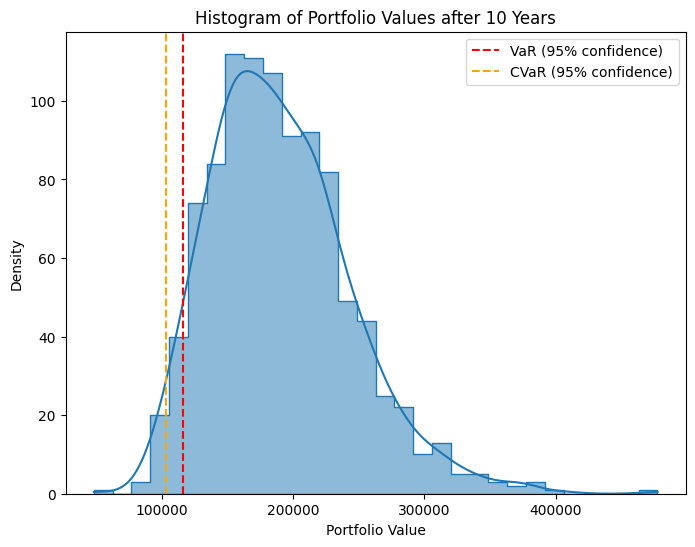

In [29]:
# Plotting a histogram of the portfolio values using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_portfolio_values['Year 10'], bins=30, kde=True, element='step')
plt.xlabel('Portfolio Value')
plt.ylabel('Density')
plt.title('Histogram of Portfolio Values after 10 Years')

# Calculate risk metrics
var_95 = df_portfolio_values['Year 10'].quantile(0.05)
cvar_95 = df_portfolio_values['Year 10'][df_portfolio_values['Year 10'] <= var_95].mean()

# Add vertical lines to mark Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR)
plt.axvline(x=var_95, color='red', linestyle='--', label='VaR (95% confidence)')
plt.axvline(x=cvar_95, color='orange', linestyle='--', label='CVaR (95% confidence)')

plt.legend()
plt.show()

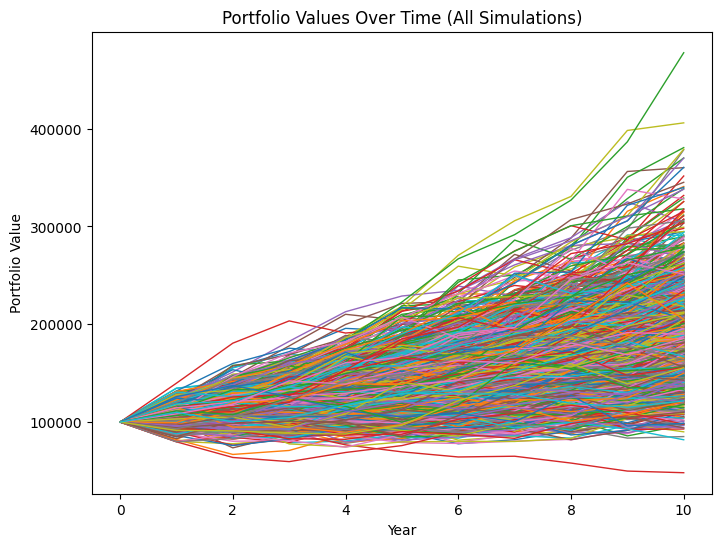

In [30]:
plt.figure(figsize=(8, 6))
for sim in range(num_simulations):
    plt.plot(range(num_years + 1), df_portfolio_values.iloc[sim, :], linewidth=1)

plt.xlabel('Year')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Values Over Time (All Simulations)')
plt.show()

### Conclusion

- In this example, we consider an investment portfolio consisting of stocks, bonds, and real estate. We specify the weights, historical returns, and standard deviations for each asset. We set the simulation parameters to run 1000 simulations over a 10-year time horizon.

- The Monte Carlo simulation generates random samples for each asset's future returns using the normal distribution with the specified mean returns and standard deviations. The future portfolio values are calculated by multiplying the previous portfolio value by the weighted returns for each simulation.

- The simulation results are stored in a dataframe `df_portfolio_values`, which contains the portfolio values for each simulation and year. We calculate descriptive statistics, including mean, standard deviation, minimum, and maximum values. We construct confidence intervals to estimate the range of potential future portfolio values.

- We visualize the distribution of portfolio values after 10 years using a histogram. Additionally, we calculate risk metrics such as `Value-at-Risk (VaR)` and `Conditional Value-at-Risk (CVaR)` at the `95%` confidence level.

> **Note:**
> Please note that this example assumes a simplified scenario and should not be considered as financial advice. It's crucial to conduct
> further research and consult with a financial professional before making any investment decisions.

## Reference

- https://github.com/arunsinp/MonteCarlo-simulation/tree/main